<a href="https://colab.research.google.com/github/Ehtisham1053/Optimization-ML-Algorithms/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent application multiple feature linear regression

In this notebook I will create a class that compute the m and b values for linear regression problem using the gradient descent technique

In [17]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
df = pd.read_csv('audi.csv')
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
c = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore' , sparse_output=False , drop='first'), ['transmission', 'fuelType', 'model']),
                       ('scaler', StandardScaler(), ['mileage', 'tax', 'mpg', 'engineSize', 'year'])

                       ], remainder='passthrough')

x_train = c.fit_transform(x_train)
x_test = c.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [40]:
X_train = x_train
X_test = x_test
Y_train = y_train
Y_test = y_test

In [54]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = None
        self.b = 0
        self.loss_history = []
        self.m_history = []
        self.b_history = []

    def fit(self, X_train, Y_train):
        n_samples, n_features = X_train.shape
        self.m = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.epochs):

            Y_pred = X_train @ self.m + self.b


            error = Y_pred - Y_train
            m_gradient = (2 / n_samples) * (X_train.T @ error)
            b_gradient = (2 / n_samples) * np.sum(error)


            self.m -= self.learning_rate * m_gradient
            self.b -= self.learning_rate * b_gradient


            self.m_history.append(self.m[0])
            self.b_history.append(self.b)


            loss = np.mean(error ** 2)
            self.loss_history.append(loss)


        print("\nFinal Coefficients (m values):", self.m)
        print("Final Bias (b):", self.b)

    def mse(self, X_test, Y_test):
        """Compute Mean Squared Error (MSE)"""
        Y_pred = self.predict(X_test)
        return np.mean((Y_pred - Y_test) ** 2)

    def mae(self, X_test, Y_test):
        """Compute Mean Absolute Error (MAE)"""
        Y_pred = self.predict(X_test)
        return np.mean(np.abs(Y_pred - Y_test))

    def rmse(self, X_test, Y_test):
        """Compute Root Mean Squared Error (RMSE)"""
        return np.sqrt(self.mse(X_test, Y_test))

    def r2_score(self, X_test, Y_test):
        """Compute R² Score"""
        Y_pred = self.predict(X_test)
        ss_total = np.sum((Y_test - np.mean(Y_test)) ** 2)
        ss_residual = np.sum((Y_test - Y_pred) ** 2)
        return 1 - (ss_residual / ss_total)

    def adjusted_r2(self, X_test, Y_test):
        """Compute Adjusted R² Score"""
        r2 = self.r2_score(X_test, Y_test)
        n = X_test.shape[0]
        k = X_test.shape[1]
        return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

    def predict(self, X_test):
        return X_test @ self.m + self.b

    def plot_training_progress(self):
        """Plots how m and b change over training."""
        plt.figure(figsize=(12, 5))


        plt.subplot(1, 2, 1)
        plt.plot(self.m_history, label="m[0] (First Feature Coefficient)", color="blue")
        plt.xlabel("Epochs")
        plt.ylabel("Value of m[0]")
        plt.title("Change in First Feature's Coefficient (m[0])")
        plt.legend()


        plt.subplot(1, 2, 2)
        plt.plot(self.b_history, label="b (Bias Term)", color="red")
        plt.xlabel("Epochs")
        plt.ylabel("Value of b")
        plt.title("Change in Bias (b)")
        plt.legend()

        plt.tight_layout()
        plt.show()



Final Coefficients (m values): [-1.58691248e+03  1.58780058e+01  3.27954638e+04 -8.27991649e+02
  4.11866074e+03  9.46415061e+02  1.15146888e+03  2.53115470e+03
  2.92333624e+03  3.41409174e+03  7.35116676e+03  1.12276709e+03
  2.47985171e+03  6.25871184e+03  1.38664549e+04  2.35246369e+04
  5.64244788e+04  8.83284919e+03  1.99406474e+04  1.64686595e+04
  2.53697967e+04  2.96189593e+03  7.46260591e+03  3.36572510e+01
  1.37280863e+03  6.48880326e+03  1.04190517e+04  2.66917650e+03
 -1.90820657e+03 -1.93070670e+03 -3.71114857e+03  2.91298980e+03
  3.91716521e+03]
Final Bias (b): 20825.46931758785


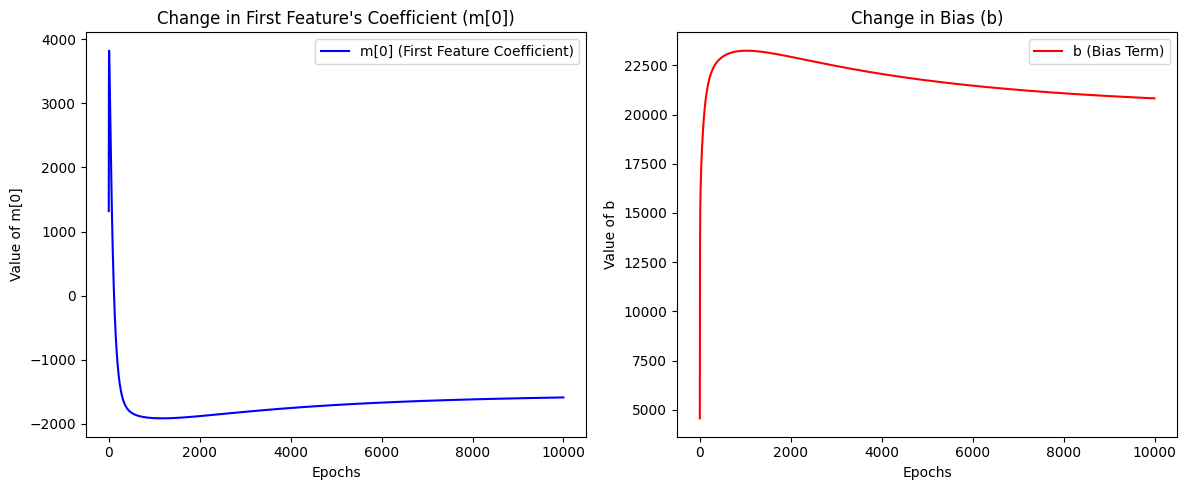

MSE: 15932417.17295553
MAE: 2648.040178251293
RMSE: 3991.5432069508565
R² Score: 0.8945777146168213
Adjusted R² Score: 0.8929210787036571


In [55]:
# we can change the learning rate and epochs according to our need
model = GradientDescentLinearRegression(learning_rate=0.1, epochs=10000)
model.fit(X_train, Y_train)
model.plot_training_progress()

print("MSE:", model.mse(X_test, Y_test))
print("MAE:", model.mae(X_test, Y_test))
print("RMSE:", model.rmse(X_test, Y_test))
print("R² Score:", model.r2_score(X_test, Y_test))
print("Adjusted R² Score:", model.adjusted_r2(X_test, Y_test))





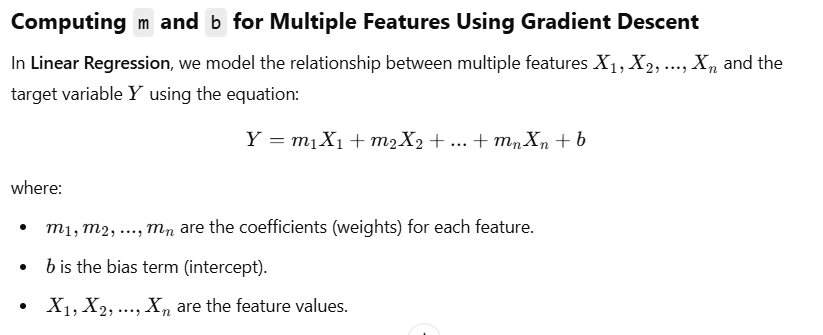

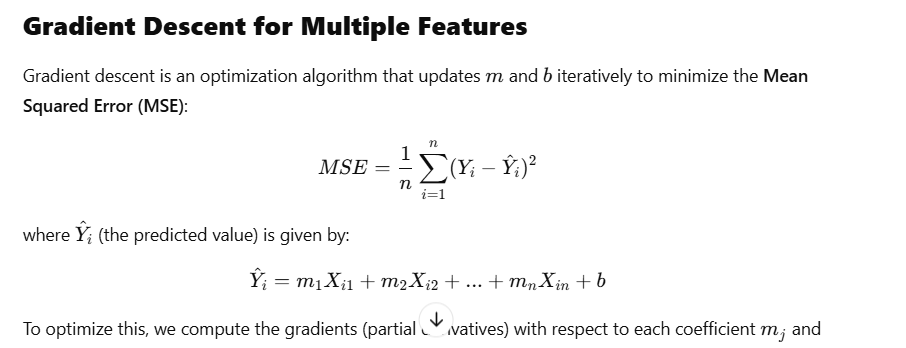

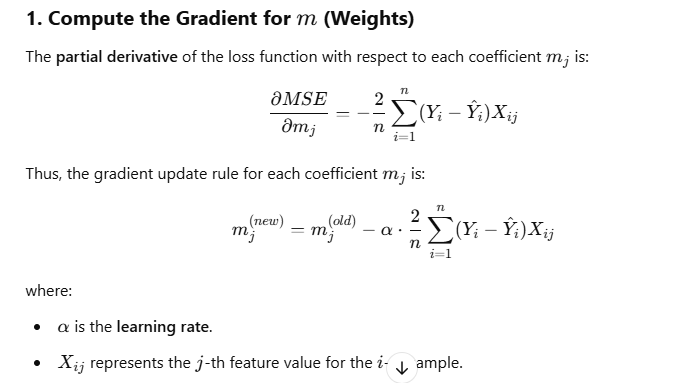

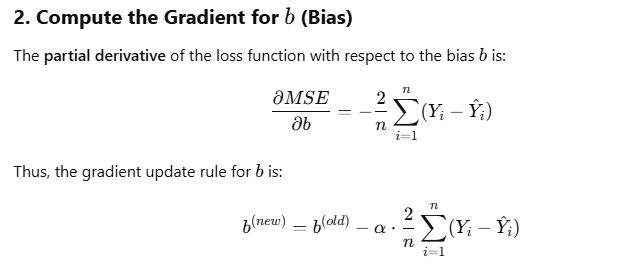